In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from google.cloud import bigquery

Using Kaggle's public dataset BigQuery integration.
We'll work with a dataset of posts on **Hacker News**, a website focusing on computer science and cybersecurity news.
**Create a "Client" object**

In [3]:
client = bigquery.Client()

Using Kaggle's public dataset BigQuery integration.


Construct a reference to the "**hacker_news**" dataset

**API request** - fetch the dataset

In [4]:
dataset_ref = client.dataset("hacker_news", project="bigquery-public-data")
dataset = client.get_dataset(dataset_ref)

List all the tables in the "hacker_news" dataset

Print names of all tables in the dataset (there are four!)



In [5]:
tables = list(client.list_tables(dataset))

for table in tables:  
    print(table.table_id)

full


Construct a reference to the "full" table

API request - fetch the table

In [6]:
table_ref = dataset_ref.table("full")

# API request - fetch the table
table = client.get_table(table_ref)

# schema  
Print information on all the columns in the "full" table in the "hacker_news" dataset

In [7]:
table.schema

[SchemaField('title', 'STRING', 'NULLABLE', 'Story title', (), None),
 SchemaField('url', 'STRING', 'NULLABLE', 'Story url', (), None),
 SchemaField('text', 'STRING', 'NULLABLE', 'Story or comment text', (), None),
 SchemaField('dead', 'BOOLEAN', 'NULLABLE', 'Is dead?', (), None),
 SchemaField('by', 'STRING', 'NULLABLE', "The username of the item's author.", (), None),
 SchemaField('score', 'INTEGER', 'NULLABLE', 'Story score', (), None),
 SchemaField('time', 'INTEGER', 'NULLABLE', 'Unix time', (), None),
 SchemaField('timestamp', 'TIMESTAMP', 'NULLABLE', 'Timestamp for the unix time', (), None),
 SchemaField('type', 'STRING', 'NULLABLE', 'type of details (comment comment_ranking poll story job pollopt)', (), None),
 SchemaField('id', 'INTEGER', 'NULLABLE', "The item's unique id.", (), None),
 SchemaField('parent', 'INTEGER', 'NULLABLE', 'Parent comment ID', (), None),
 SchemaField('descendants', 'INTEGER', 'NULLABLE', 'Number of story or poll descendants', (), None),
 SchemaField('ran

**Preview the first five lines of the "full" table**

In [9]:
client.list_rows(table, max_results=5).to_dataframe()

,title,url,text,dead,by,score,time,timestamp,type,id,parent,descendants,ranking,deleted
0,None,None,"If the crocodile looked him up on Google, we b...",None,raxxorrax,NaN,1633421535,2021-10-05 08:12:15+00:00,comment,28756662,28750122,NaN,NaN,None
1,None,None,What exactly are you looking for? I think Pyto...,None,abiro,NaN,1569141387,2019-09-22 08:36:27+00:00,comment,21040311,21040141,NaN,NaN,None
2,None,None,"Ironically, this very project might help out w...",None,mjevans,NaN,1505769703,2017-09-18 21:21:43+00:00,comment,15279716,15276626,NaN,NaN,None
3,None,None,As you start to gain some experience it can be...,None,every_other,NaN,1538575027,2018-10-03 13:57:07+00:00,comment,18130207,18128477,NaN,NaN,None
4,None,None,"That’s what I was referring to, yes. I heard o...",None,manmal,NaN,1615664155,2021-03-13 19:35:55+00:00,comment,26449260,26449237,NaN,NaN,None


**Preview the first five entries in the "by" column of the "full" tabl**

In [10]:
client.list_rows(table, selected_fields=table.schema[:1], max_results=5).to_dataframe()

,title
0,None
1,None
2,None
3,None
4,None


# Exercise
The **chicago-crime** dataset is used to practice teaching the material that has been learned so far

**Cell to fetch the dataset**

In [12]:
from google.cloud import bigquery

# Create a "Client" object
client = bigquery.Client()

# Construct a reference to the "chicago_crime" dataset
dataset_ref = client.dataset("chicago_crime", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

Using Kaggle's public dataset BigQuery integration.


1) **Count tables in the dataset**

How many tables are in the Chicago Crime dataset?

In [13]:
# List all the tables in the "chicago_crime" dataset
tables = list(client.list_tables(dataset))

# Print number of tables in the dataset
print(len(tables))


1


2) **Explore the table schema**

How many columns in the crime table have TIMESTAMP data?

In [14]:
# Construct a reference to the "crime" table
table_ref = dataset_ref.table("crime")

# API request - fetch the table
table = client.get_table(table_ref)

# Print information on all the columns in the "crime" table in the "chicago_crime" dataset
print(table.schema)

[SchemaField('unique_key', 'INTEGER', 'REQUIRED', None, (), None), SchemaField('case_number', 'STRING', 'NULLABLE', None, (), None), SchemaField('date', 'TIMESTAMP', 'NULLABLE', None, (), None), SchemaField('block', 'STRING', 'NULLABLE', None, (), None), SchemaField('iucr', 'STRING', 'NULLABLE', None, (), None), SchemaField('primary_type', 'STRING', 'NULLABLE', None, (), None), SchemaField('description', 'STRING', 'NULLABLE', None, (), None), SchemaField('location_description', 'STRING', 'NULLABLE', None, (), None), SchemaField('arrest', 'BOOLEAN', 'NULLABLE', None, (), None), SchemaField('domestic', 'BOOLEAN', 'NULLABLE', None, (), None), SchemaField('beat', 'INTEGER', 'NULLABLE', None, (), None), SchemaField('district', 'INTEGER', 'NULLABLE', None, (), None), SchemaField('ward', 'INTEGER', 'NULLABLE', None, (), None), SchemaField('community_area', 'INTEGER', 'NULLABLE', None, (), None), SchemaField('fbi_code', 'STRING', 'NULLABLE', None, (), None), SchemaField('x_coordinate', 'FLOAT'

3) **Create a crime map**

If you wanted to create a map with a dot at the location of each crime, what are the names of the two fields you likely need to pull out of the crime table to plot the crimes on a map?

In [15]:
fields_for_plotting = ['latitude', 'longitude']

# Basic concepts for doing SQL queries

How to use SQL queries on a dataset called **OpenAQ**

In [22]:
from google.cloud import bigquery

# Create a "Client" object
client = bigquery.Client()

# Construct a reference to the "openaq" dataset
dataset_ref = client.dataset("openaq", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# List all the tables in the "openaq" dataset
tables = list(client.list_tables(dataset))

# Print names of all tables in the dataset (there's only one!)
for table in tables:  
    print(table.table_id)

Using Kaggle's public dataset BigQuery integration.
global_air_quality


This dataset has only one table named:**global_air_quality**

It will be **query**

In [23]:
# Construct a reference to the "global_air_quality" table
table_ref = dataset_ref.table("global_air_quality")

# API request - fetch the table
table = client.get_table(table_ref)

# Preview the first five lines of the "global_air_quality" table
client.list_rows(table, max_results=5).to_dataframe()

,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours,location_geom
0,"Borówiec, ul. Drapałka",Borówiec,PL,bc,0.85217,2022-04-28 07:00:00+00:00,µg/m³,GIOS,1.0,52.276794,17.074114,POINT(52.276794 1)
1,"Kraków, ul. Bulwarowa",Kraków,PL,bc,0.91284,2022-04-27 23:00:00+00:00,µg/m³,GIOS,1.0,50.069308,20.053492,POINT(50.069308 1)
2,"Płock, ul. Reja",Płock,PL,bc,1.41000,2022-03-30 04:00:00+00:00,µg/m³,GIOS,1.0,52.550938,19.709791,POINT(52.550938 1)
3,"Elbląg, ul. Bażyńskiego",Elbląg,PL,bc,0.33607,2022-05-03 13:00:00+00:00,µg/m³,GIOS,1.0,54.167847,19.410942,POINT(54.167847 1)
4,"Piastów, ul. Pułaskiego",Piastów,PL,bc,0.51000,2022-05-11 05:00:00+00:00,µg/m³,GIOS,1.0,52.191728,20.837489,POINT(52.191728 1)


**Create Query**

In [25]:
# Query to select all the items from the "city" column where the "country" column is 'US'
query = """
        SELECT city
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE country = 'US'
        """

**Submitting the query to the dataset**

In [27]:
# Create a "Client" object
client = bigquery.Client()
# Set up the query
query_job = client.query(query)
# API request - run the query, and return a pandas DataFrame
us_cities = query_job.to_dataframe()

Using Kaggle's public dataset BigQuery integration.


In [28]:
# What five cities have the most measurements?
us_cities.city.value_counts().head()

city
Phoenix-Mesa-Scottsdale                     39414
Los Angeles-Long Beach-Santa Ana            27479
Riverside-San Bernardino-Ontario            26887
New York-Northern New Jersey-Long Island    25417
San Francisco-Oakland-Fremont               22710
Name: count, dtype: int64

**More queries¶**

If you want multiple columns, you can select them with a comma between the names:

In [ ]:
query = """
        SELECT city, country
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE country = 'US'
        """


The BigQuery dataset provides 5 TB of free scans to every Kaggle user every 30 days.
• It should be noted that large queries can quickly finish this limit.
• It is better for each user to know the estimated size of the query he creates.

In [29]:
# Query to get the score column from every row where the type column has value "job"
query = """
        SELECT score, title
        FROM `bigquery-public-data.hacker_news.full`
        WHERE type = "job" 
        """

# Create a QueryJobConfig object to estimate size of query without running it
dry_run_config = bigquery.QueryJobConfig(dry_run=True)

# API request - dry run query to estimate costs
dry_run_query_job = client.query(query, job_config=dry_run_config)

print("This query will process {} bytes.".format(dry_run_query_job.total_bytes_processed))

This query will process 490833096 bytes.


We can also specify a parameter when running the query to limit the amount of data you want to extract. Here is an example with a low limit.

In [30]:
# Only run the query if it's less than 1 MB
ONE_MB = 1000*1000
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=ONE_MB)

# Set up the query (will only run if it's less than 1 MB)
safe_query_job = client.query(query, job_config=safe_config)

# API request - try to run the query, and return a pandas DataFrame
safe_query_job.to_dataframe()

,score,title
0,1.0,Hack education at Clever (YC S12)
1,1.0,Anjuna Security is hiring systems software eng...
2,1.0,Love startups but not a developer? We need ten...
3,1.0,Experiment (YC W13) Is Hiring a Reviewer (Remote)
4,1.0,The Black Pearl (YC S14) Is Looking for Crewme...
...,...,...
13980,1.0,Watsi is looking for a front-end developer to ...
13981,1.0,"PlanGrid (YC W12) Is Hiring Front End, Infrast..."
13982,1.0,The Muse (YC W12) Is Hiring an Email Marketing...
13983,3.0,BackType Is Hiring Search And Software Engineers


# Exercise

The **openaq** dataset is used to practice teaching the material that has been learned so far

In [31]:
from google.cloud import bigquery

# Create a "Client" object
client = bigquery.Client()

# Construct a reference to the "openaq" dataset
dataset_ref = client.dataset("openaq", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# Construct a reference to the "global_air_quality" table
table_ref = dataset_ref.table("global_air_quality")

# API request - fetch the table
table = client.get_table(table_ref)

# Preview the first five lines of the "global_air_quality" table
client.list_rows(table, max_results=5).to_dataframe()

Using Kaggle's public dataset BigQuery integration.


,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours,location_geom
0,"Borówiec, ul. Drapałka",Borówiec,PL,bc,0.85217,2022-04-28 07:00:00+00:00,µg/m³,GIOS,1.0,52.276794,17.074114,POINT(52.276794 1)
1,"Kraków, ul. Bulwarowa",Kraków,PL,bc,0.91284,2022-04-27 23:00:00+00:00,µg/m³,GIOS,1.0,50.069308,20.053492,POINT(50.069308 1)
2,"Płock, ul. Reja",Płock,PL,bc,1.41000,2022-03-30 04:00:00+00:00,µg/m³,GIOS,1.0,52.550938,19.709791,POINT(52.550938 1)
3,"Elbląg, ul. Bażyńskiego",Elbląg,PL,bc,0.33607,2022-05-03 13:00:00+00:00,µg/m³,GIOS,1.0,54.167847,19.410942,POINT(54.167847 1)
4,"Piastów, ul. Pułaskiego",Piastów,PL,bc,0.51000,2022-05-11 05:00:00+00:00,µg/m³,GIOS,1.0,52.191728,20.837489,POINT(52.191728 1)


**Units of measurement**
Which countries have reported the amount of pollution in "ppm" units? In the following code cell, set first_query to an SQL query that takes the appropriate entries from the country column

In [32]:
# Query to select countries with units of "ppm"
first_query = first_query = """
              SELECT country
              FROM `bigquery-public-data.openaq.global_air_quality`
              WHERE unit = "ppm"
              """ # Your code goes here

# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 10 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
first_query_job = client.query(first_query, job_config=safe_config)

# API request - run the query, and return a pandas DataFrame
first_results = first_query_job.to_dataframe()

# View top few rows of results
print(first_results.head())

  country
0      AR
1      IL
2      IL
3      AR
4      AR


2) **High air quality**
Which pollution levels were reported to be exactly 0?

In [33]:
# Query to select all columns where pollution levels are exactly 0
zero_pollution_query = """
                       SELECT *
                       FROM `bigquery-public-data.openaq.global_air_quality`
                       WHERE value = 0
                       """ # Your code goes here

# Set up the query
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(zero_pollution_query, job_config=safe_config)

# API request - run the query and return a pandas DataFrame
zero_pollution_results = query_job.to_dataframe() # Your code goes here

print(zero_pollution_results.head())

                                location                 city country  \
0           Koszalin, ul. Armii Krajowej             Koszalin      PL   
1             Żary, ul. Szymanowskiego 8                 Żary      PL   
2                  Kraków, ul. Bulwarowa               Kraków      PL   
3  Gorzów Wlkp. ul. Kosynierów Gdyńskich  Gorzów Wielkopolski      PL   
4              Zielonka, Bory Tucholskie             Zielonka      PL   

  pollutant  value                 timestamp   unit source_name  latitude  \
0        bc    0.0 2022-05-05 01:00:00+00:00  µg/m³        GIOS       1.0   
1        bc    0.0 2022-05-02 12:00:00+00:00  µg/m³        GIOS       1.0   
2        bc    0.0 2022-04-08 04:00:00+00:00  µg/m³        GIOS       1.0   
3        bc    0.0 2022-05-12 16:00:00+00:00  µg/m³        GIOS       1.0   
4        bc    0.0 2022-04-16 04:00:00+00:00  µg/m³        GIOS       1.0   

   longitude  averaged_over_in_hours       location_geom  
0  54.193986               16.172544  P

**Group By, Having & Count**

The **Hacker News**** dataset is used.
We'll work with the full table and begin by printing the first few rows.settings and data retrieval that already exists 

In [35]:
from google.cloud import bigquery

# Create a "Client" object
client = bigquery.Client()

# Construct a reference to the "hacker_news" dataset
dataset_ref = client.dataset("hacker_news", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# Construct a reference to the "full" table
table_ref = dataset_ref.table("full")

# API request - fetch the table
table = client.get_table(table_ref)

# Preview the first five lines of the table
client.list_rows(table, max_results=5).to_dataframe()

Using Kaggle's public dataset BigQuery integration.


,title,url,text,dead,by,score,time,timestamp,type,id,parent,descendants,ranking,deleted
0,None,None,"If the crocodile looked him up on Google, we b...",None,raxxorrax,NaN,1633421535,2021-10-05 08:12:15+00:00,comment,28756662,28750122,NaN,NaN,None
1,None,None,What exactly are you looking for? I think Pyto...,None,abiro,NaN,1569141387,2019-09-22 08:36:27+00:00,comment,21040311,21040141,NaN,NaN,None
2,None,None,"Ironically, this very project might help out w...",None,mjevans,NaN,1505769703,2017-09-18 21:21:43+00:00,comment,15279716,15276626,NaN,NaN,None
3,None,None,As you start to gain some experience it can be...,None,every_other,NaN,1538575027,2018-10-03 13:57:07+00:00,comment,18130207,18128477,NaN,NaN,None
4,None,None,"That’s what I was referring to, yes. I heard o...",None,manmal,NaN,1615664155,2021-03-13 19:35:55+00:00,comment,26449260,26449237,NaN,NaN,None


In [37]:
# Query to select comments that received more than 10 replies
query_popular = """
                SELECT parent, COUNT(id)
                FROM `bigquery-public-data.hacker_news.full`
                GROUP BY parent
                HAVING COUNT(id) > 10
                """
# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 10 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(query_popular, job_config=safe_config)

# API request - run the query, and convert the results to a pandas DataFrame
popular_comments = query_job.to_dataframe()

# Print the first five rows of the DataFrame
popular_comments.head()

,parent,f0_
0,27948256.0,40
1,12016568.0,670
2,20175304.0,46
3,28512121.0,64
4,28184006.0,39


In [38]:
# Improved version of earlier query, now with aliasing & improved readability
query_improved = """
                 SELECT parent, COUNT(1) AS NumPosts
                 FROM `bigquery-public-data.hacker_news.full`
                 GROUP BY parent
                 HAVING COUNT(1) > 10
                 """

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(query_improved, job_config=safe_config)

# API request - run the query, and convert the results to a pandas DataFrame
improved_df = query_job.to_dataframe()

# Print the first five rows of the DataFrame
improved_df.head()

,parent,NumPosts
0,4323597.0,229
1,7233001.0,45
2,12817468.0,72
3,22597192.0,40
4,21378471.0,74


### **Exercises**

1) **Prolific commenters****
Hacker News would like to send awards to everyone who has written more than 10,000 posts. Write a query that returns all authors with more than 10,000 posts as well as their post counts. Call the column with post counts NumPosts.

In [39]:
# Query to select prolific commenters and post counts
prolific_commenters_query = """
                            SELECT `by` AS author, COUNT(1) AS NumPosts
                            FROM `bigquery-public-data.hacker_news.full`
                            GROUP BY author
                            HAVING COUNT(1) > 10000
                            """

# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 1 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(prolific_commenters_query, job_config=safe_config)

# API request - run the query, and return a pandas DataFrame
prolific_commenters = query_job.to_dataframe()

# View top few rows of results
print(prolific_commenters.head())

        author  NumPosts
0        pjc50     19086
1     brudgers     16927
2  maxerickson     15020
3    philwelch     11000
4  ColinWright     13187


2) **Deleted comments**

How many comments have been deleted? (If a comment was deleted, the deleted column in the comments table will have the value True.)

In [41]:
# Write your query here# Query to determine how many posts were deleted
deleted_posts_query = """
                      SELECT COUNT(1) AS num_deleted_posts
                      FROM `bigquery-public-data.hacker_news.full`
                      WHERE deleted = True
                      """

# Set up the query
query_job = client.query(deleted_posts_query)

# API request - run the query, and return a pandas DataFrame
deleted_posts = query_job.to_dataframe()

# View results
print(deleted_posts) 

   num_deleted_posts
0             859401


## Order By

  The US Traffic Accident Database is used, which contains information on US traffic accidents in which at least one person died.

In [42]:
from google.cloud import bigquery

# Create a "Client" object
client = bigquery.Client()

# Construct a reference to the "nhtsa_traffic_fatalities" dataset
dataset_ref = client.dataset("nhtsa_traffic_fatalities", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# Construct a reference to the "accident_2015" table
table_ref = dataset_ref.table("accident_2015")

# API request - fetch the table
table = client.get_table(table_ref)

# Preview the first five lines of the "accident_2015" table
client.list_rows(table, max_results=5).to_dataframe()

Using Kaggle's public dataset BigQuery integration.


,state_number,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles,...,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_1_name,related_factors_crash_level_2,related_factors_crash_level_2_name,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash
0,30,Montana,300019,5,5,0,0,0,7,7,...,45,0,None,0,None,0,None,1,0,2015-03-28 14:58:00+00:00
1,39,Ohio,390099,7,7,0,0,0,15,15,...,24,27,Backup Due to Prior Crash,0,None,0,None,1,0,2015-02-14 11:19:00+00:00
2,49,Utah,490123,16,16,0,0,0,28,28,...,99,0,None,0,None,0,None,1,0,2015-04-14 12:24:00+00:00
3,48,Texas,481184,6,5,1,0,5,5,10,...,99,0,None,0,None,0,None,1,0,2015-05-27 16:40:00+00:00
4,41,Oregon,410333,11,11,0,0,0,14,14,...,99,0,None,0,None,0,None,1,0,2015-11-17 18:17:00+00:00


A query that calculates the number of accidents on each day of the week and then the table based on the number of accidents in order to determine the days with the highest number of accidents.

In [44]:
# Query to find out the number of accidents for each day of the week
query = """
        SELECT COUNT(consecutive_number) AS num_accidents, 
               EXTRACT(DAYOFWEEK FROM timestamp_of_crash) AS day_of_week
        FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
        GROUP BY day_of_week
        ORDER BY num_accidents DESC
        """
# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 1 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**9)
query_job = client.query(query, job_config=safe_config)

# API request - run the query, and convert the results to a pandas DataFrame
accidents_by_day = query_job.to_dataframe()

# Print the DataFrame
accidents_by_day

,num_accidents,day_of_week
0,5659,7
1,5298,1
2,4916,6
3,4460,5
4,4182,4
5,4038,2
6,3985,3


## Exercise

Using the **world_bank_intl_education**  dataset, show the calculation of the average ratio of education costs to the gross domestic product (GDP) for each country between 2010 and 2017.

In [45]:
country_spend_pct_query = """
                          SELECT country_name, AVG(value) AS avg_ed_spending_pct
                          FROM `bigquery-public-data.world_bank_intl_education.international_education`
                          WHERE indicator_code = 'SE.XPD.TOTL.GD.ZS' and year >= 2010 and year <= 2017
                          GROUP BY country_name
                          ORDER BY avg_ed_spending_pct DESC
                          """


# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 1 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
country_spend_pct_query_job = client.query(country_spend_pct_query, job_config=safe_config)

# API request - run the query, and return a pandas DataFrame
country_spending_results = country_spend_pct_query_job.to_dataframe()

# View top few rows of results
print(country_spending_results.head())


            country_name  avg_ed_spending_pct
0                   Cuba            12.837270
1  Micronesia, Fed. Sts.            12.467750
2        Solomon Islands            10.001080
3                Moldova             8.372153
4                Namibia             8.349610


A query that selects index code and index name for all codes with at least 175 rows in 2016.

In [46]:
code_count_query = """
                   SELECT indicator_code, indicator_name, COUNT(1) AS num_rows
                   FROM `bigquery-public-data.world_bank_intl_education.international_education`
                   WHERE year = 2016
                   GROUP BY indicator_name, indicator_code
                   HAVING COUNT(1) >= 175
                   ORDER BY COUNT(1) DESC
                   """

# Set up the query
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
code_count_query_job = client.query(code_count_query, job_config=safe_config)

# API request - run the query, and return a pandas DataFrame
code_count_results = code_count_query_job.to_dataframe()

# View top few rows of results
print(code_count_results.head())

      indicator_code                   indicator_name  num_rows
0        SP.POP.TOTL                Population, total       232
1        SP.POP.GROW     Population growth (annual %)       232
2     IT.NET.USER.P2  Internet users (per 100 people)       223
3  SP.POP.0014.FE.IN    Population, ages 0-14, female       213
4  SP.POP.1564.MA.IN     Population, ages 15-64, male       213


## As & With

**Objective**:The objective of this query is to create a Common Table Expression (CTE) to identify the number of Bitcoin transactions performed each day for the entire time period available in the Bitcoin transactions dataset.

Example:How many Bitcoin transactions occur in a month?

Dataset: **bitcoin-blockchain**.




In [50]:
from google.cloud import bigquery

# Create a "Client" object
client = bigquery.Client()

# Construct a reference to the "crypto_bitcoin" dataset
dataset_ref = client.dataset("crypto_bitcoin", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# Construct a reference to the "transactions" table
table_ref = dataset_ref.table("transactions")

# API request - fetch the table
table = client.get_table(table_ref)

tables = list(client.list_tables(dataset))

# Print names of all tables in the dataset (there's only one!)
for table in tables:  
    print(table.table_id)

# Preview the first five lines of the "transactions" table
client.list_rows(table, max_results=5).to_dataframe()

Using Kaggle's public dataset BigQuery integration.
blocks
inputs
outputs
transactions


,hash,size,virtual_size,version,lock_time,block_hash,block_number,block_timestamp,block_timestamp_month,input_count,output_count,input_value,output_value,is_coinbase,fee,inputs,outputs
0,a16f3ce4dd5deb92d98ef5cf8afeaf0775ebca408f708b...,275,275,1,0,00000000dc55860c8a29c58d45209318fa9e9dc2c1833a...,181,2009-01-12 06:02:13+00:00,2009-01-01,1,2,4000000000.000000000,4000000000.000000000,False,0E-9,"[{'index': 0, 'spent_transaction_hash': 'f4184...","[{'index': 0, 'script_asm': '04b5abd412d4341b4..."
1,591e91f809d716912ca1d4a9295e70c3e78bab077683f7...,275,275,1,0,0000000054487811fc4ff7a95be738aa5ad9320c394c48...,182,2009-01-12 06:12:16+00:00,2009-01-01,1,2,3000000000.000000000,3000000000.000000000,False,0E-9,"[{'index': 0, 'spent_transaction_hash': 'a16f3...","[{'index': 0, 'script_asm': '0401518fa1d1e1e3e..."
2,12b5633bad1f9c167d523ad1aa1947b2732a865bf5414e...,276,276,1,0,00000000f46e513f038baf6f2d9a95b2a28d8a6c985bcf...,183,2009-01-12 06:34:22+00:00,2009-01-01,1,2,2900000000.000000000,2900000000.000000000,False,0E-9,"[{'index': 0, 'spent_transaction_hash': '591e9...","[{'index': 0, 'script_asm': '04baa9d3665315562..."
3,828ef3b079f9c23829c56fe86e85b4a69d9e06e5b54ea5...,276,276,1,0,00000000fb5b44edc7a1aa105075564a179d65506e2bd2...,248,2009-01-12 20:04:20+00:00,2009-01-01,1,2,2800000000.000000000,2800000000.000000000,False,0E-9,"[{'index': 0, 'spent_transaction_hash': '12b56...","[{'index': 0, 'script_asm': '04bed827d37474bef..."
4,35288d269cee1941eaebb2ea85e32b42cdb2b04284a56d...,277,277,1,0,00000000689051c09ff2cd091cc4c22c10b965eb8db3ad...,545,2009-01-15 05:48:32+00:00,2009-01-01,1,2,2500000000.000000000,2500000000.000000000,False,0E-9,"[{'index': 0, 'spent_transaction_hash': 'd71fd...","[{'index': 0, 'script_asm': '044a656f065871a35..."


In [49]:
# Query to select the number of transactions per date, sorted by date
query_with_CTE = """ 
                 WITH time AS 
                 (
                     SELECT DATE(block_timestamp) AS trans_date
                     FROM `bigquery-public-data.crypto_bitcoin.transactions`
                 )
                 SELECT COUNT(1) AS transactions,
                        trans_date
                 FROM time
                 GROUP BY trans_date
                 ORDER BY trans_date
                 """

# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 10 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(query_with_CTE, job_config=safe_config)

# API request - run the query, and convert the results to a pandas DataFrame
transactions_by_date = query_job.to_dataframe()

# Print the first five rows
transactions_by_date.head()

,transactions,trans_date
0,1,2009-01-03
1,14,2009-01-09
2,61,2009-01-10
3,93,2009-01-11
4,101,2009-01-12


Since they're returned sorted, we can easily plot the raw results to show us the number of Bitcoin transactions per day over the whole timespan of this dataset.

<Axes: xlabel='trans_date'>

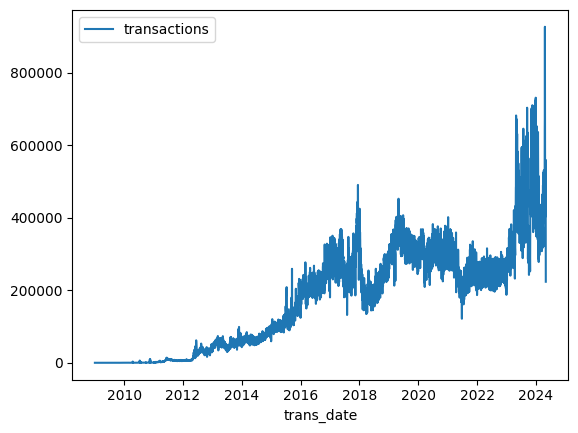

In [51]:
transactions_by_date.set_index('trans_date').plot()

## Joining Data



We join two tables from the **stackoverflow** dataset. The first table is the **licenses** table and the second table is the **sample_files** table. Both tables have **repo_name** column

In [1]:
from google.cloud import bigquery

# Create a "Client" object
client = bigquery.Client()

# Construct a reference to the "github_repos" dataset
dataset_ref = client.dataset("github_repos", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# Construct a reference to the "licenses" table
licenses_ref = dataset_ref.table("licenses")

# API request - fetch the table
licenses_table = client.get_table(licenses_ref)

# Preview the first five lines of the "licenses" table
client.list_rows(licenses_table, max_results=5).to_dataframe()

Using Kaggle's public dataset BigQuery integration.


,repo_name,license
0,autarch/Dist-Zilla-Plugin-Test-TidyAll,artistic-2.0
1,thundergnat/Prime-Factor,artistic-2.0
2,kusha-b-k/Turabian_Engin_Fan,artistic-2.0
3,onlinepremiumoutlet/onlinepremiumoutlet.github.io,artistic-2.0
4,huangyuanlove/LiaoBa_Service,artistic-2.0


In [2]:
# Construct a reference to the "sample_files" table
files_ref = dataset_ref.table("sample_files")

# API request - fetch the table
files_table = client.get_table(files_ref)

# Preview the first five lines of the "sample_files" table
client.list_rows(files_table, max_results=5).to_dataframe()

,repo_name,ref,path,mode,id,symlink_target
0,EOL/eol,refs/heads/master,generate/vendor/railties,40960,0338c33fb3fda57db9e812ac7de969317cad4959,/usr/share/rails-ruby1.8/railties
1,np/ling,refs/heads/master,tests/success/merger_seq_inferred.t/merger_seq...,40960,dd4bb3d5ecabe5044d3fa5a36e0a9bf7ca878209,../../../fixtures/all/merger_seq_inferred.ll
2,np/ling,refs/heads/master,fixtures/sequence/lettype.ll,40960,8fdf536def2633116d65b92b3b9257bcf06e3e45,../all/lettype.ll
3,np/ling,refs/heads/master,fixtures/failure/wrong_order_seq3.ll,40960,c2509ae1196c4bb79d7e60a3d679488ca4a753e9,../all/wrong_order_seq3.ll
4,np/ling,refs/heads/master,issues/sequence/keep.t,40960,5721de3488fb32745dfc11ec482e5dd0331fecaf,../keep.t


Next, we write a **query** that uses information in both tables to determine how many files are released in each license.

In [5]:
# Query to determine the number of files per license, sorted by number of files
query = """
        SELECT L.license, COUNT(1) AS number_of_files
        FROM `bigquery-public-data.github_repos.sample_files` AS sf
        INNER JOIN `bigquery-public-data.github_repos.licenses` AS L 
            ON sf.repo_name = L.repo_name
        GROUP BY L.license
        ORDER BY number_of_files DESC
        """

# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 10 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(query, job_config=safe_config)

# API request - run the query, and convert the results to a pandas DataFrame
file_count_by_license = query_job.to_dataframe()

In [6]:
# Print the DataFrame
file_count_by_license

,license,number_of_files
0,mit,20560894
1,gpl-2.0,16608922
2,apache-2.0,7201141
3,gpl-3.0,5107676
4,bsd-3-clause,3465437
5,agpl-3.0,1372100
6,lgpl-2.1,799664
7,bsd-2-clause,692357
8,lgpl-3.0,582277
9,mpl-2.0,457000


## JOINs and UNIONs
The code cell below fetches the **posts_questions** table from the **stackoverflow** dataset. We also preview the first five rows of the table.

In [8]:
from google.cloud import bigquery

# Create a "Client" object
client = bigquery.Client()

# Construct a reference to the "stackoverflow" dataset
dataset_ref = client.dataset("stackoverflow", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# Construct a reference to the "posts_questions" table
table_ref = dataset_ref.table("posts_questions")

# API request - fetch the table
table = client.get_table(table_ref)

# Preview the first five lines of the table
client.list_rows(table, max_results=5).to_dataframe()

Using Kaggle's public dataset BigQuery integration.


,id,title,body,accepted_answer_id,answer_count,comment_count,community_owned_date,creation_date,favorite_count,last_activity_date,last_edit_date,last_editor_display_name,last_editor_user_id,owner_display_name,owner_user_id,parent_id,post_type_id,score,tags,view_count
0,320268,Html.ActionLink doesn’t render # properly,<p>When using Html.ActionLink passing a string...,NaN,0,0,NaT,2008-11-26 10:42:37.477000+00:00,0,2009-02-06 20:13:54.370000+00:00,NaT,None,NaN,Paulo,NaN,None,1,0,asp.net-mvc,390
1,324003,Primitive recursion,<p>how will i define the function 'simplify' ...,NaN,0,0,NaT,2008-11-27 15:12:37.497000+00:00,0,2012-09-25 19:54:40.597000+00:00,2012-09-25 19:54:40.597000+00:00,Marcin,1288.0,None,41000.0,None,1,0,haskell|lambda|functional-programming|lambda-c...,497
2,390605,While vs. Do While,<p>I've seen both the blocks of code in use se...,390608.0,0,0,NaT,2008-12-24 01:49:54.230000+00:00,2,2008-12-24 03:08:55.897000+00:00,NaT,None,NaN,Unkwntech,115.0,None,1,0,language-agnostic|loops,11262
3,413246,Protect ASP.NET Source code,<p>Im currently doing some research in how to ...,NaN,0,0,NaT,2009-01-05 14:23:51.040000+00:00,0,2009-03-24 21:30:22.370000+00:00,2009-01-05 14:42:28.257000+00:00,Tom Anderson,13502.0,Velnias,NaN,None,1,0,asp.net|deployment|obfuscation,4823
4,454921,"Difference between ""int[] myArray"" and ""int my...",<blockquote>\n <p><strong>Possible Duplicate:...,454928.0,0,0,NaT,2009-01-18 10:22:52.177000+00:00,0,2009-01-18 10:30:50.930000+00:00,2017-05-23 11:49:26.567000+00:00,None,-1.0,Evan Fosmark,49701.0,None,1,0,java|arrays,798


In [9]:
# Construct a reference to the "posts_answers" table
table_ref = dataset_ref.table("posts_answers")

# API request - fetch the table
table = client.get_table(table_ref)

# Preview the first five lines of the table
client.list_rows(table, max_results=5).to_dataframe()

,id,title,body,accepted_answer_id,answer_count,comment_count,community_owned_date,creation_date,favorite_count,last_activity_date,last_edit_date,last_editor_display_name,last_editor_user_id,owner_display_name,owner_user_id,parent_id,post_type_id,score,tags,view_count
0,18,None,<p>For a table like this:</p>\n\n<pre><code>CR...,None,None,2,NaT,2008-08-01 05:12:44.193000+00:00,None,2016-06-02 05:56:26.060000+00:00,2016-06-02 05:56:26.060000+00:00,Jeff Atwood,126039,phpguy,NaN,17,2,59,None,None
1,165,None,"<p>You can use a <a href=""http://sharpdevelop....",None,None,0,NaT,2008-08-01 18:04:25.023000+00:00,None,2019-04-06 14:03:51.080000+00:00,2019-04-06 14:03:51.080000+00:00,None,1721793,user2189331,NaN,145,2,10,None,None
2,1028,None,<p>The VB code looks something like this:</p>\...,None,None,0,NaT,2008-08-04 04:58:40.300000+00:00,None,2013-02-07 13:22:14.680000+00:00,2013-02-07 13:22:14.680000+00:00,None,395659,user2189331,NaN,947,2,8,None,None
3,1073,None,<p>My first choice would be a dedicated heap t...,None,None,0,NaT,2008-08-04 07:51:02.997000+00:00,None,2015-09-01 17:32:32.120000+00:00,2015-09-01 17:32:32.120000+00:00,None,45459,user2189331,NaN,1069,2,29,None,None
4,1260,None,<p>I found the answer. all you have to do is a...,None,None,0,NaT,2008-08-04 14:06:02.863000+00:00,None,2016-12-20 08:38:48.867000+00:00,2016-12-20 08:38:48.867000+00:00,None,1221571,Jin,NaN,1229,2,1,None,None


The purpose of writing a query, how long does it take for the questions to receive an answer?
We want you to look at the data to see how long it generally takes for questions to get answered.
To that end, the following query focuses on questions asked in January 2018. This query returns a table with two columns:
q_id : Question ID
time_to_answer: the amount of time (in seconds) it took for the question to receive an answer.

In [10]:
first_query = """
              SELECT q.id AS q_id,
                  MIN(TIMESTAMP_DIFF(a.creation_date, q.creation_date, SECOND)) as time_to_answer
              FROM `bigquery-public-data.stackoverflow.posts_questions` AS q
                  INNER JOIN `bigquery-public-data.stackoverflow.posts_answers` AS a
              ON q.id = a.parent_id
              WHERE q.creation_date >= '2018-01-01' and q.creation_date < '2018-02-01'
              GROUP BY q_id
              ORDER BY time_to_answer
              """

first_result = client.query(first_query).result().to_dataframe()
print("Percentage of answered questions: %s%%" % \
      (sum(first_result["time_to_answer"].notnull()) / len(first_result) * 100))
print("Number of questions:", len(first_result))
first_result.head()

Percentage of answered questions: 100.0%
Number of questions: 134719


,q_id,time_to_answer
0,48382183,-132444692
1,48174391,0
2,48375126,0
3,48092100,0
4,48102324,0


This query seeks to extract the information of creating the first question and answer for each user in a certain period of time. It uses three different tables and uses **LEFT JOIN** to connect them:

Users table named **u**:
id column: to identify users.
column creation_date: for the creation time of the user.

The posts_answers table named **a**:
column owner_user_id: to identify the users who created the response.
column creation_date: for the creation time of the response.

The posts_questions table named **q**:
column owner_user_id: to identify the users who created the question.
creation_date column: for the creation time of the question.

In [12]:
three_tables_query = """
                     SELECT u.id AS id,
                         MIN(q.creation_date) AS q_creation_date,
                         MIN(a.creation_date) AS a_creation_date
                     FROM `bigquery-public-data.stackoverflow.users` AS u
                         LEFT JOIN `bigquery-public-data.stackoverflow.posts_answers` AS a
                             ON u.id = a.owner_user_id
                         LEFT JOIN `bigquery-public-data.stackoverflow.posts_questions` AS q
                             ON q.owner_user_id = u.id
                     WHERE u.creation_date >= '2019-01-01' and u.creation_date < '2019-02-01'
                     GROUP BY id
                    """

